In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.utils import shuffle

In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
df.head()

(159571, 24)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,category,rating,...,sent_token,polarity_sentence,polarity_comment,polarity_comment_s,word_count,char_count,char_count_s,polarity_min,polarity_max,polarity_mean
idx,,,,,,,,,,,,,,,,,,,,,
3a4c7758fad18de3,3a4c7758fad18de3,", I hope your retarded kids get anal raped and...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[, I hope your retarded kids get anal raped an...","(-0.6, 1.0, -0.018750000000000003, [-0.4, -0.4...",0.00,0.00,94,494,494,-0.6000,1.0000,-0.018750
24d2b50726b67167,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1,ToSTObThInIH,6,...,[I am going to murder ZimZalaBim ST47 for bein...,"(-1.0, -1.0, -1.0, [-1.0])",0.00,0.00,12,68,68,-1.0000,-1.0000,-1.000000
c586b7a2fd575b13,c586b7a2fd575b13,"Shut up you asswipe, we don't care. I'll decap...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[Shut up you asswipe, we don't care., I'll dec...","(-0.2, 0.0, -0.07555555555555557, [0.0, -0.177...",-0.25,-0.25,24,3890,1000,-0.2000,0.0000,-0.075556
77d84b1321c22d9a,77d84b1321c22d9a,"LGBT \n\nyou little fuck , are you a fag , tha...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[LGBT \n\nyou little fuck , are you a fag , th...","(-0.17750000000000005, 0.0, -0.088750000000000...",0.00,0.00,56,280,280,-0.1775,0.0000,-0.088750
1368c10281978876,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1,ToSTObThInIH,6,...,"[You're a stupid cunt \n\nFuck you dumb arse, ...","(-0.41250000000000003, -0.41250000000000003, -...",0.00,0.00,59,278,278,-0.4125,-0.4125,-0.412500


In [3]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'category', 'rating', 'clean',
       'comment_text_s', 'comment_text_f', 'token_clean', 'sent_token',
       'polarity_sentence', 'polarity_comment', 'polarity_comment_s',
       'word_count', 'char_count', 'char_count_s', 'polarity_min',
       'polarity_max', 'polarity_mean'],
      dtype='object')

In [4]:
df_t = df[df['rating']>0]

df_t['total'] = df_t['toxic']+df_t['severe_toxic'] + df_t['obscene'] + df_t['threat']+df_t['insult']+df_t['identity_hate']

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df_t.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'category', 'rating', 'clean',
       'comment_text_s', 'comment_text_f', 'token_clean', 'sent_token',
       'polarity_sentence', 'polarity_comment', 'polarity_comment_s',
       'word_count', 'char_count', 'char_count_s', 'polarity_min',
       'polarity_max', 'polarity_mean', 'total'],
      dtype='object')

In [6]:
df_A = df_t[['rating','toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','total']]
df_A = df_A[df_A['rating']>0]
df_A = df_A.groupby('rating').sum()

df_A['%To'] = df_A['toxic'] / df_A['total']
df_A['%ST'] = df_A['severe_toxic'] / df_A['total']
df_A['%Ob'] = df_A['obscene'] / df_A['total']
df_A['%Th'] = df_A['threat'] / df_A['total']
df_A['%IH'] = df_A['identity_hate'] / df_A['total']
df_A['%In'] = df_A['insult'] / df_A['total']

In [7]:
df_A

,toxic,severe_toxic,obscene,threat,insult,identity_hate,total,%To,%ST,%Ob,%Th,%IH,%In
rating,,,,,,,,,,,,,
1,5666,0,317,22,301,54,6360,0.890881,0.000000,0.049843,0.003459,0.008491,0.047327
2,3263,41,1944,118,1427,167,6960,0.468822,0.005891,0.279310,0.016954,0.023994,0.205029
3,4189,186,4024,47,3984,197,12627,0.331749,0.014730,0.318682,0.003722,0.015601,0.315514
4,1760,1008,1748,140,1749,635,7040,0.250000,0.143182,0.248295,0.019886,0.090199,0.248438
5,385,329,385,120,385,321,1925,0.200000,0.170909,0.200000,0.062338,0.166753,0.200000
6,31,31,31,31,31,31,186,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [8]:
# df_A['%To'] = df_A['toxic'] / df_A['total']
# df_A['%ST'] = df_A['severe_toxic'] / df_A['total']
# df_A['%Ob'] = df_A['obscene'] / df_A['total']
# df_A['%Th'] = df_A['threat'] / df_A['total']
# df_A['%IH'] = df_A['identity_hate'] / df_A['total']
# df_A['%In'] = df_A['insult'] / df_A['total']
df_A['rating'] = df_A.index
# df_A['rating2'] = df_A.index
# df_A = df_A.set_index('rating2')
df_A

,toxic,severe_toxic,obscene,threat,insult,identity_hate,total,%To,%ST,%Ob,%Th,%IH,%In,rating
rating,,,,,,,,,,,,,,
1,5666,0,317,22,301,54,6360,0.890881,0.000000,0.049843,0.003459,0.008491,0.047327,1
2,3263,41,1944,118,1427,167,6960,0.468822,0.005891,0.279310,0.016954,0.023994,0.205029,2
3,4189,186,4024,47,3984,197,12627,0.331749,0.014730,0.318682,0.003722,0.015601,0.315514,3
4,1760,1008,1748,140,1749,635,7040,0.250000,0.143182,0.248295,0.019886,0.090199,0.248438,4
5,385,329,385,120,385,321,1925,0.200000,0.170909,0.200000,0.062338,0.166753,0.200000,5
6,31,31,31,31,31,31,186,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,6


In [9]:
# df_A = df_A.append(df.sum(numeric_only=True), ignore_index=True)


In [10]:
df_A

,toxic,severe_toxic,obscene,threat,insult,identity_hate,total,%To,%ST,%Ob,%Th,%IH,%In,rating
rating,,,,,,,,,,,,,,
1,5666,0,317,22,301,54,6360,0.890881,0.000000,0.049843,0.003459,0.008491,0.047327,1
2,3263,41,1944,118,1427,167,6960,0.468822,0.005891,0.279310,0.016954,0.023994,0.205029,2
3,4189,186,4024,47,3984,197,12627,0.331749,0.014730,0.318682,0.003722,0.015601,0.315514,3
4,1760,1008,1748,140,1749,635,7040,0.250000,0.143182,0.248295,0.019886,0.090199,0.248438,4
5,385,329,385,120,385,321,1925,0.200000,0.170909,0.200000,0.062338,0.166753,0.200000,5
6,31,31,31,31,31,31,186,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,6


In [11]:
# df_A['IH%rating'] = df_A['identity_hate'].apply(lambda x: )
# df_A['identity_hate'].hist(by=df_A['rating'])

In [12]:
df_A.columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',
       'total', '%To', '%ST', '%Ob', '%Th', '%IH', '%In', 'rating'],
      dtype='object')

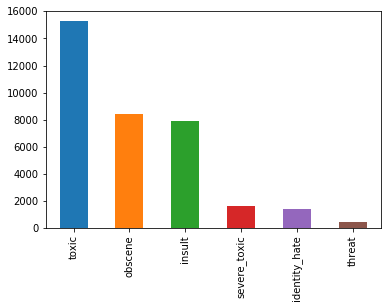

In [13]:
df_A1 = df_A[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
df_A1.sum(axis=0,numeric_only=True).sort_values(ascending=False).plot(kind='bar')

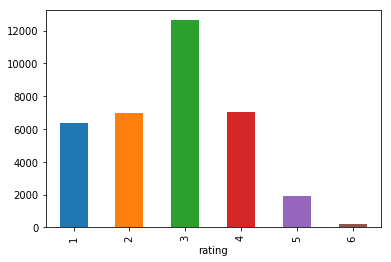

In [14]:
df_A.total.plot(kind='bar')

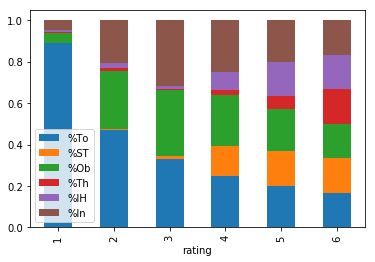

In [15]:
df_B = df_A[['%To', '%ST', '%Ob', '%Th', '%IH', '%In']]

df_B.plot(kind='bar', stacked=True)

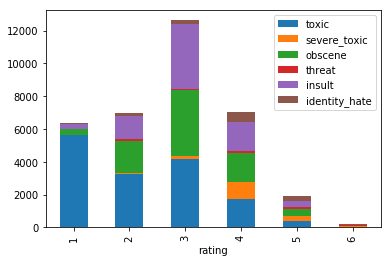

In [16]:
df_C = df_A[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

df_C.plot(kind='bar', stacked=True)

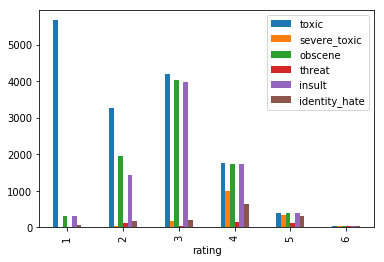

In [17]:
df_C.plot(kind='bar', stacked=False)

(-1.1088677490027474,
 1.1004222741742298,
 -1.1090899474394647,
 1.122194931220467)

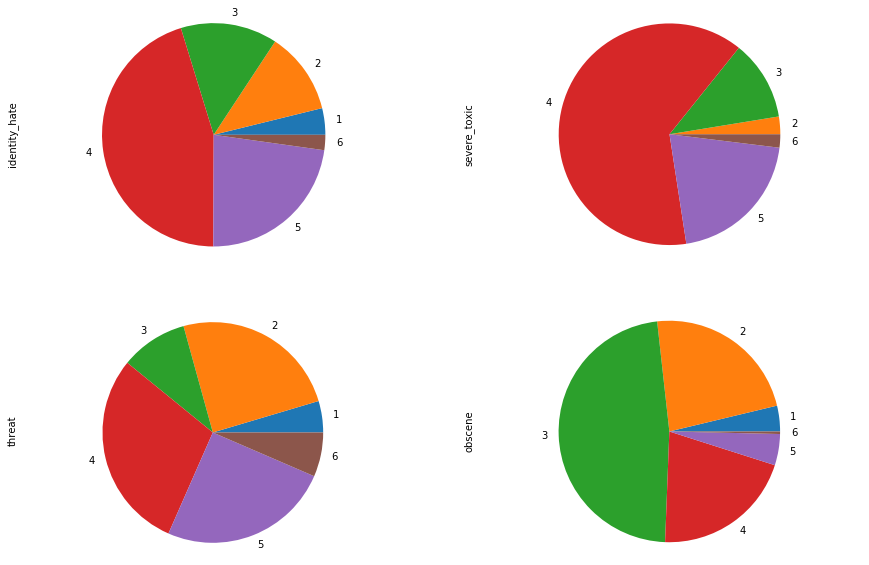

In [18]:
fig,ax = plt.subplots(figsize=(15,10),nrows=3,ncols=2)
ax = plt.subplot(221)
df_A.identity_hate.groupby(df_A.rating).sum().plot(kind='pie')
plt.axis('equal')

ax = plt.subplot(222)
df_A.severe_toxic.groupby(df_A.rating).sum().plot(kind='pie')
plt.axis('equal')

ax = plt.subplot(223)
df_A.threat.groupby(df_A.rating).sum().plot(kind='pie')
plt.axis('equal')

ax = plt.subplot(224)
df_A.obscene.groupby(df_A.rating).sum().plot(kind='pie')
plt.axis('equal')

# ax = plt.subplot(225)
# df_A.identity_hate.groupby(df_A.rating).sum().plot(kind='pie')
# plt.axis('equal')

# ax = plt.subplot(226)
# df_A.identity_hate.groupby(df_A.rating).sum().plot(kind='pie')
# plt.axis('equal')

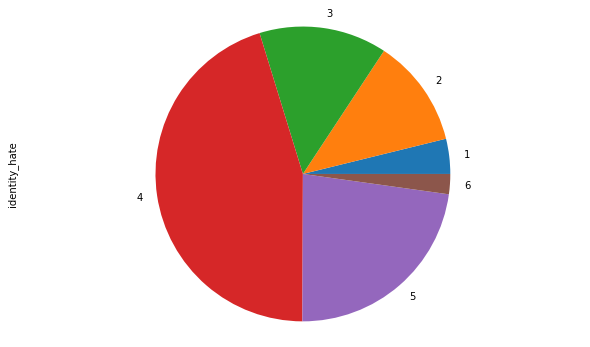

In [19]:
df_A.identity_hate.groupby(df_A.rating).sum().plot(kind='pie', figsize=(10,6))
plt.axis('equal')
# plt.savefig('../charts/ratingpie.png')
plt.show()

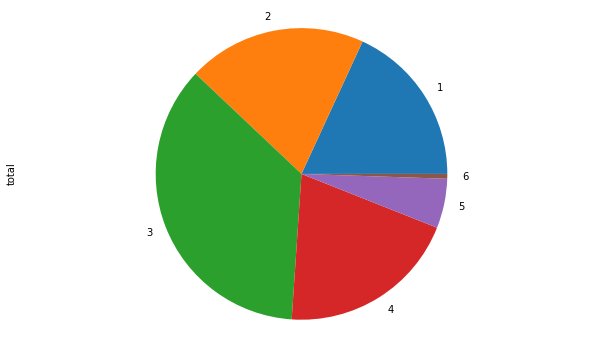

In [20]:
df_A.total.groupby(df_A.rating).sum().plot(kind='pie', figsize=(10,6))
plt.axis('equal')
plt.savefig('../charts/ratingpie.png')
plt.show()

In [21]:
# sns.jointplot(x='rating',y='total', kind='reg',color='g',data=df_A,scatter_kws={'alpha':0.3})

In [22]:
df_D = df[['category','toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
df_D = df_D.groupby('category').sum()
df_D['total'] = df_D['toxic']+df_D['severe_toxic'] + df_D['obscene'] + df_D['threat']+df_D['insult']+df_D['identity_hate']
df_D['category'] = df_D.index

In [23]:
df_D = df_D.sort_values(['total'], ascending=[False])
df_D

,toxic,severe_toxic,obscene,threat,insult,identity_hate,total,category
category,,,,,,,,
ToObIn,3800,0,3800,0,3800,0,11400,ToObIn
To,5666,0,0,0,0,0,5666,To
ToSTObIn,989,989,989,0,989,0,3956,ToSTObIn
ToOb,1758,0,1758,0,0,0,3516,ToOb
ToObInIH,618,0,618,0,618,618,2472,ToObInIH
ToIn,1215,0,0,0,1215,0,2430,ToIn
ToSTObInIH,265,265,265,0,265,265,1325,ToSTObInIH
ToObThIn,131,0,131,131,131,0,524,ToObThIn
ToSTOb,158,158,158,0,0,0,474,ToSTOb


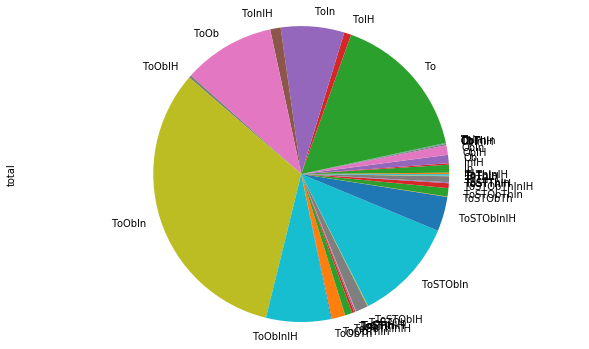

In [24]:
df_D.total.groupby(df_D.category).sum().plot(kind='pie', figsize=(10,6))
plt.axis('equal')
# plt.savefig('../charts/ratingpie.png')
plt.show()

In [25]:
df_E = df[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
df_E.corr().sort_values('toxic')

,toxic,severe_toxic,obscene,threat,insult,identity_hate
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009


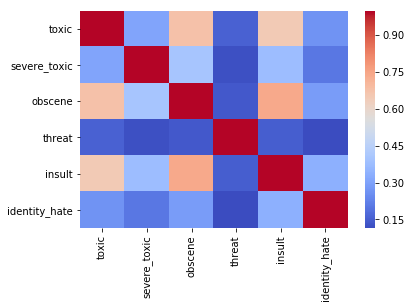

In [26]:
sns.heatmap(df_E.corr(), cmap = 'coolwarm')

In [27]:
df_A.columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',
       'total', '%To', '%ST', '%Ob', '%Th', '%IH', '%In', 'rating'],
      dtype='object')

### Remove Toxic class

In [28]:
df_E0 = df[['category','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
df_E0['adj_rating'] = df_E0['severe_toxic'] + df_E0['obscene'] + df_E0['threat'] + df_E0['insult'] + df_E0['identity_hate']
df_E0 = df_E0[df_E0['adj_rating']>0]
df_E0['total'] = df_E0['severe_toxic'] + df_E0['obscene'] + df_E0['threat']+df_E0['insult']+df_E0['identity_hate']
df_E = df_E0.groupby('adj_rating').sum()
df_E

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,severe_toxic,obscene,threat,insult,identity_hate,total
adj_rating,,,,,,
1,41,2075,135,1516,190,3957
2,186,4190,50,4176,210,8812
3,1008,1768,142,1769,653,5340
4,329,385,120,385,321,1540
5,31,31,31,31,31,155


In [29]:
df_E['%ST'] = df_E['severe_toxic'] / df_E['total']
df_E['%Ob'] = df_E['obscene'] / df_E['total']
df_E['%Th'] = df_E['threat'] / df_E['total']
df_E['%IH'] = df_E['identity_hate'] / df_E['total']
df_E['%In'] = df_E['insult'] / df_E['total']
df_E['adj_rating'] = df_E.index

df_E

,severe_toxic,obscene,threat,insult,identity_hate,total,%ST,%Ob,%Th,%IH,%In,adj_rating
adj_rating,,,,,,,,,,,,
1,41,2075,135,1516,190,3957,0.010361,0.524387,0.034117,0.048016,0.383119,1
2,186,4190,50,4176,210,8812,0.021108,0.475488,0.005674,0.023831,0.473899,2
3,1008,1768,142,1769,653,5340,0.188764,0.331086,0.026592,0.122285,0.331273,3
4,329,385,120,385,321,1540,0.213636,0.250000,0.077922,0.208442,0.250000,4
5,31,31,31,31,31,155,0.200000,0.200000,0.200000,0.200000,0.200000,5


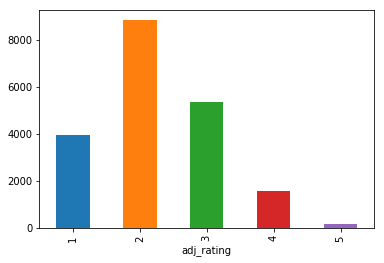

In [30]:
df_E.total.plot(kind='bar')

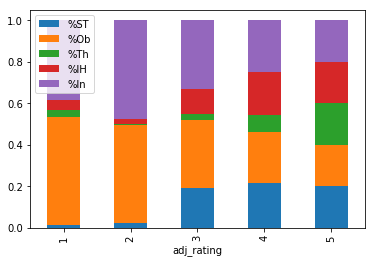

In [31]:
df_E1 = df_E[['%ST', '%Ob', '%Th', '%IH', '%In']]

df_E1.plot(kind='bar', stacked=True)

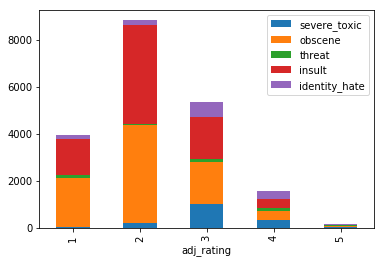

In [32]:
df_E2 = df_E[['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

df_E2.plot(kind='bar', stacked=True)

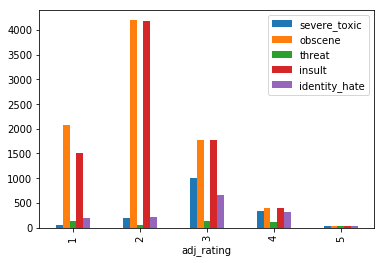

In [33]:
df_E2.plot(kind='bar', stacked=False)

(-1.1103225137628192,
 1.10049154827442,
 -1.1112311056254036,
 1.1077613039803256)

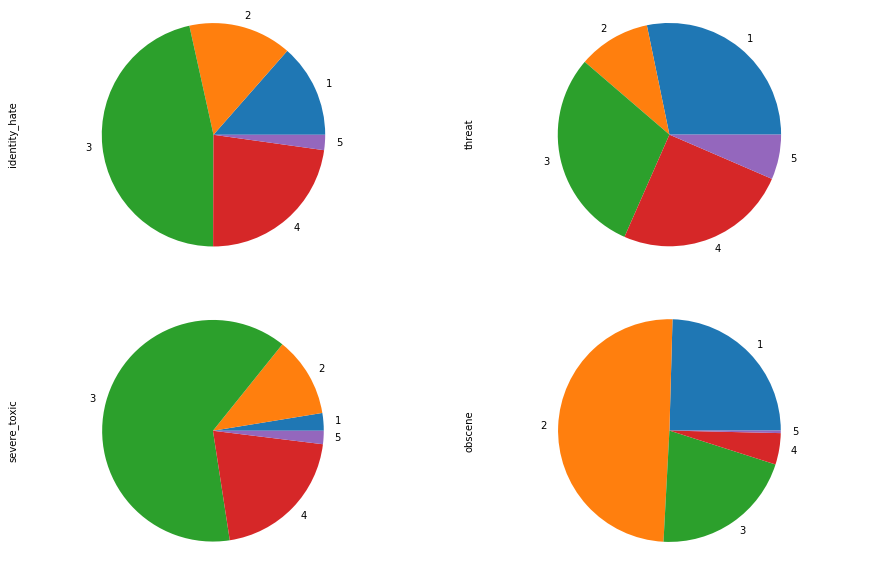

In [34]:
fig,ax = plt.subplots(figsize=(15,10),nrows=3,ncols=2)
ax = plt.subplot(221)
df_E.identity_hate.groupby(df_E.adj_rating).sum().plot(kind='pie')
plt.axis('equal')

ax = plt.subplot(222)
df_E.threat.groupby(df_E.adj_rating).sum().plot(kind='pie')
plt.axis('equal')

ax = plt.subplot(223)
df_E.severe_toxic.groupby(df_E.adj_rating).sum().plot(kind='pie')
plt.axis('equal')

ax = plt.subplot(224)
df_E.obscene.groupby(df_E.adj_rating).sum().plot(kind='pie')
plt.axis('equal')

In [35]:
df_E2

,severe_toxic,obscene,threat,insult,identity_hate
adj_rating,,,,,
1,41,2075,135,1516,190
2,186,4190,50,4176,210
3,1008,1768,142,1769,653
4,329,385,120,385,321
5,31,31,31,31,31


In [36]:
# df_E4 = df_E2
# df_E4['adj_rating'] = df_E4.index
# df_E4 = df_E4[df_E4['adj_rating']==5]
# df_E4
# df_E4.plot(kind='bar', stacked=False)
# df_E4.total.groupby(df_E4.category).sum().plot(kind='pie', figsize=(10,6))
# plt.axis('equal')
# # plt.savefig('../charts/ratingpie.png')
# plt.show()

### Scattertext

In [37]:
# https://github.com/JasonKessler/scattertext#installation
import scattertext as st
import spacy
from pprint import pprint

In [38]:
# !pip install spacy

In [39]:
# convention_df = st.SampleCorpora.ConventionData2012.get_data()  
# convention_df.iloc[0]

In [45]:
# Turn it into a Scattertext Corpus 
df_st = shuffle(df)[-500:]
nlp = spacy.load('en')
corpus = st.CorpusFromPandas(df_st, category_col='toxic', text_col='comment_text_s',nlp=nlp).build()

In [46]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
term_freq_df = corpus.get_term_freq_df()
# term_freq_df['Democratic Score'] = corpus.get_scaled_f_scores('democrat')
# pprint(list(term_freq_df.sort_values(by='Democratic Score', ascending=False).index[:10]))

In [ ]:
# term_freq_df = corpus.get_term_freq_df()
# term_freq_df['Republican Score'] = corpus.get_scaled_f_scores('republican')
# pprint(list(term_freq_df.sort_values(by='Republican Score', ascending=False).index[:10]))

In [ ]:
html = st.produce_scattertext_explorer(corpus,category=6,category_name=6,width_in_pixels=1000)

In [ ]:
open("Rating-Visualization.html", 'wb').write(html.encode('utf-8'))

In [ ]:
empath_corpus = st.CorpusFromParsedDocuments(df,category_col='rating',
                                             feats_from_spacy_doc=st.FeatsFromOnlyEmpath(),
                                             parsed_col='comment_text_s').build()
html = st.produce_scattertext_explorer(empath_corpus,category=6,
                                       category_name=6,
                                       width_in_pixels=1000,
                                       use_non_text_features=True,use_full_doc=True)
open("Rating-Visualization-Empath.html", 'wb').write(html.encode('utf-8'))

In [ ]:
from scattertext import word_similarity_explorer
html = word_similarity_explorer(corpus,category='democrat',category_name='Democratic',
                                not_category_name='Republican',target_term='jobs',
                                minimum_term_frequency=5,pmi_threshold_coefficient=4,
                                width_in_pixels=1000,metadata=convention_df['speaker'],
                                alpha=0.01,max_p_val=0.05,save_svg_button=True)
open("Convention-Visualization-Jobs.html", 'wb').write(html.encode('utf-8'))

In [ ]:
import spacy
from gensim.models import word2vec
from scattertext import SampleCorpora, word_similarity_explorer_gensim, Word2VecFromParsedCorpus
from scattertext.CorpusFromParsedDocuments import CorpusFromParsedDocuments
nlp = spacy.load('en')
convention_df = SampleCorpora.ConventionData2012.get_data()
convention_df['parsed'] = convention_df.text.apply(nlp)
corpus = CorpusFromParsedDocuments(convention_df, category_col='party', parsed_col='parsed').build()
model = word2vec.Word2Vec(size=300,
                          alpha=0.025,
                          window=5,
                          min_count=5,
                          max_vocab_size=None,
                          sample=0,
                          seed=1,
                          workers=1,
                          min_alpha=0.0001,
                          sg=1,
                          hs=1,
                          negative=0,
                          cbow_mean=0,
                          iter=1,
                          null_word=0,
                          trim_rule=None,
                          sorted_vocab=1)
html = word_similarity_explorer_gensim(corpus,
                                       category='democrat',
                                       category_name='Democratic',
                                       not_category_name='Republican',
                                       target_term='jobs',
                                       minimum_term_frequency=5,
                                       pmi_threshold_coefficient=4,
                                       width_in_pixels=1000,
                                       metadata=convention_df['speaker'],
                                       word2vec=Word2VecFromParsedCorpus(corpus, model).train(),
                                       max_p_val=0.05,
                                       save_svg_button=True)
open('./demo_gensim_similarity.html', 'wb').write(html.encode('utf-8'))